In [209]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

from tqdm import tqdm
from scipy import stats
from scipy import stats as sp
from scipy.optimize import fminbound
from sklearn import preprocessing
from scipy.stats import chi2_contingency

In [3]:
file_path = "./dataset_new/"
retail_data = pd.read_csv(f"{file_path}Retail data.csv")
industry_data = pd.read_csv(f"{file_path}Industry data.csv")

---

## 1. Store별 가지고 있는 기간

### 1)Store별 기간의 대략적 범위와 가지고 있는 기간

In [4]:
retail_data_store_month = retail_data[["Month", "Store"]]
retail_data_store_month.drop_duplicates(inplace=True)
retail_data_store_month.reset_index(inplace=True, drop=True)
YM_r = []  # YYMM
for i in tqdm(range(len(retail_data_store_month))):
    YM_r.append(int(retail_data_store_month.loc[i]["Month"][2:4] + retail_data_store_month.loc[i]["Month"][5:7]))

/tmp/ipykernel_21601/175981401.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  retail_data_store_month.drop_duplicates(inplace=True)
100%|██████████| 34512/34512 [00:06<00:00, 5447.48it/s]


In [5]:
industry_data_store_month = industry_data[["Month", "Store"]]
industry_data_store_month.drop_duplicates(inplace=True)
industry_data_store_month.reset_index(inplace=True, drop=True)
YM_i = []  # YYMM
for i in tqdm(range(len(industry_data_store_month))):
    YM_i.append(int(industry_data_store_month.loc[i]["Month"][2:4] + industry_data_store_month.loc[i]["Month"][5:7]))

/tmp/ipykernel_21601/2317767264.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  industry_data_store_month.drop_duplicates(inplace=True)
100%|██████████| 53311/53311 [00:09<00:00, 5446.10it/s]


In [6]:
retail_data_store_month["YM"] = YM_r
industry_data_store_month["YM"] = YM_i
industry_data_store_month

/tmp/ipykernel_21601/3812650028.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  retail_data_store_month["YM"] = YM_r
/tmp/ipykernel_21601/3812650028.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  industry_data_store_month["YM"] = YM_i


,Month,Store,YM
0,2015-01-01 00:00:00,1,1501
1,2015-02-01 00:00:00,1,1502
2,2015-03-01 00:00:00,1,1503
3,2015-04-01 00:00:00,1,1504
4,2015-05-01 00:00:00,1,1505
...,...,...,...
53306,2021-11-01 00:00:00,642,2111
53307,2021-12-01 00:00:00,642,2112
53308,2022-01-01 00:00:00,642,2201
53309,2022-02-01 00:00:00,642,2202


In [24]:
r_ym_store_ct = pd.crosstab(retail_data_store_month["YM"], retail_data_store_month["Store"]).loc[::-1]  # 행 순서 역순
i_ym_store_ct = pd.crosstab(industry_data_store_month["YM"], industry_data_store_month["Store"]).loc[::-1]
r_ym_store_ct

Store,1,2,3,4,5,6,7,9,10,12,...,633,634,635,636,637,638,639,640,641,642
YM,,,,,,,,,,,,,,,,,,,,,
2203,0,1,1,1,1,1,1,1,0,1,...,1,1,1,1,1,0,1,1,1,1
2202,1,1,1,1,1,1,1,1,0,1,...,1,1,1,1,1,0,1,1,1,1
2201,1,1,1,1,1,1,1,1,0,1,...,1,1,1,1,1,0,1,1,1,0
2112,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,0,1,1,1,0
2111,1,1,1,1,1,1,1,1,1,1,...,1,1,0,1,1,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1505,0,0,0,0,0,0,0,0,0,1,...,1,1,0,1,1,0,1,1,1,1
1504,0,0,0,0,0,0,0,0,0,1,...,1,1,0,0,1,0,1,1,1,1
1503,0,0,0,0,0,0,0,0,0,1,...,0,1,0,1,1,0,1,1,1,0


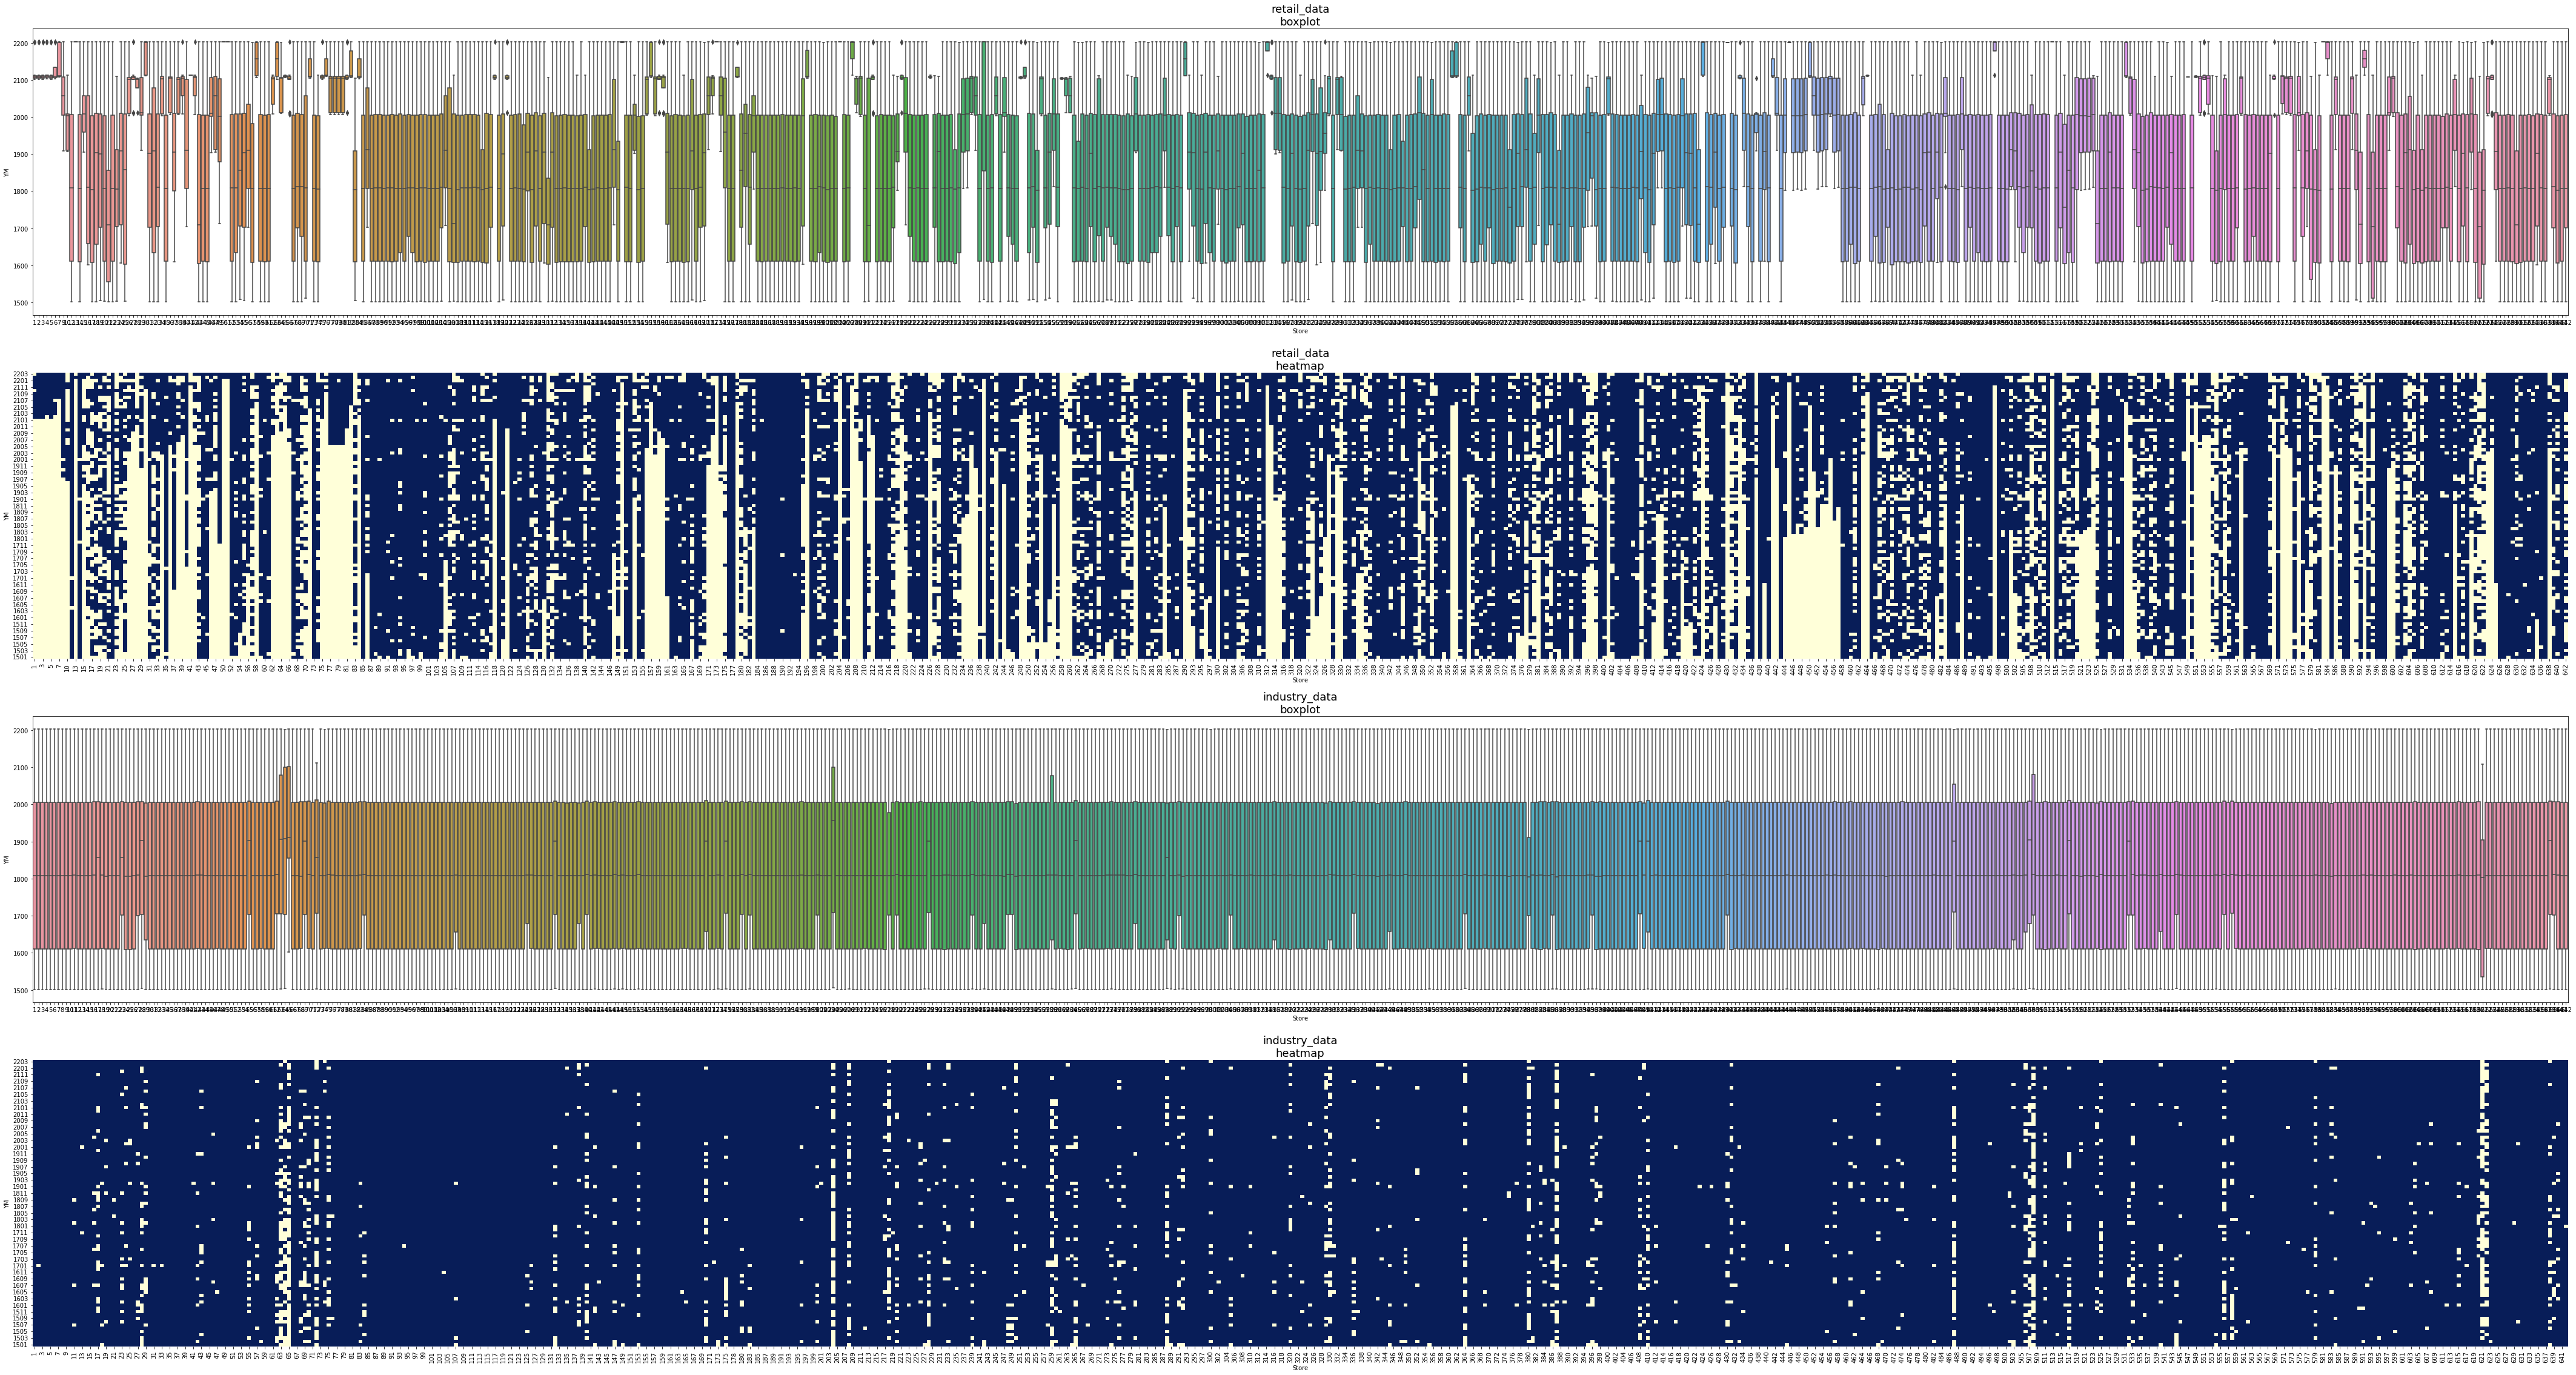

In [29]:
# # # 시간 오래걸려서 이미지 사라지지 않는 이상 재실행 X
# fig, axes = plt.subplots(4,1,figsize=(75,40))
# sns.boxplot(x='Store', y='YM', data=retail_data_store_month, ax = axes[0])
# sns.heatmap(r_ym_store_ct, ax=axes[1],cmap='YlGnBu',cbar=False)
# sns.boxplot(x='Store', y='YM', data=industry_data_store_month, ax = axes[2]);
# sns.heatmap(i_ym_store_ct, ax=axes[3],cmap='YlGnBu',cbar=False)


# axes[0].set_title("retail_data\nboxplot", fontsize=18)
# axes[1].set_title("retail_data\nheatmap", fontsize=18)
# axes[2].set_title('industry_data\nboxplot', fontsize=18)
# axes[3].set_title('industry_data\nheatmap', fontsize=18)
# plt.show()

**retail data**
- 전체적으로 15년도~22년도 정보를 가졌으나, 일부 Data는 후반기 정보만 가진 것이 존재한다

**industry data**
- 대부분이 15~22년도 정보를 가짐

#### analysis result
- 이전에 전반적 판매량 상승세를 보인 것은,  **초반 부분의 데이터가 부족해서일 가능성이 높아보임**
- 생각보다 연속적인 기간을 가지고 있지 않음 -> `가게 별 가지고 있는 데이터의 수를 고려해야하지 않을까?` 

#### 2) 가게별 가지고 있는 데이터의 월수

In [98]:
r_store_cnt_month = pd.DataFrame(r_ym_store_ct.sum())
r_store_cnt_month.reset_index(inplace=True)
r_store_cnt_month.rename(columns={0: "month_cnt"}, inplace=True)

i_store_cnt_month = pd.DataFrame(i_ym_store_ct.sum())
i_store_cnt_month.reset_index(inplace=True)
i_store_cnt_month.rename(columns={0: "month_cnt"}, inplace=True)

print(len(r_store_cnt_month))
print(len(i_store_cnt_month))

r_store_cnt_month

617
638


,Store,month_cnt
0,1,12
1,2,14
2,3,14
3,4,13
4,5,14
...,...,...
612,638,13
613,639,66
614,640,60
615,641,87


- retail store과 industry store가 가지고 있는 가게의 정보가 다르다

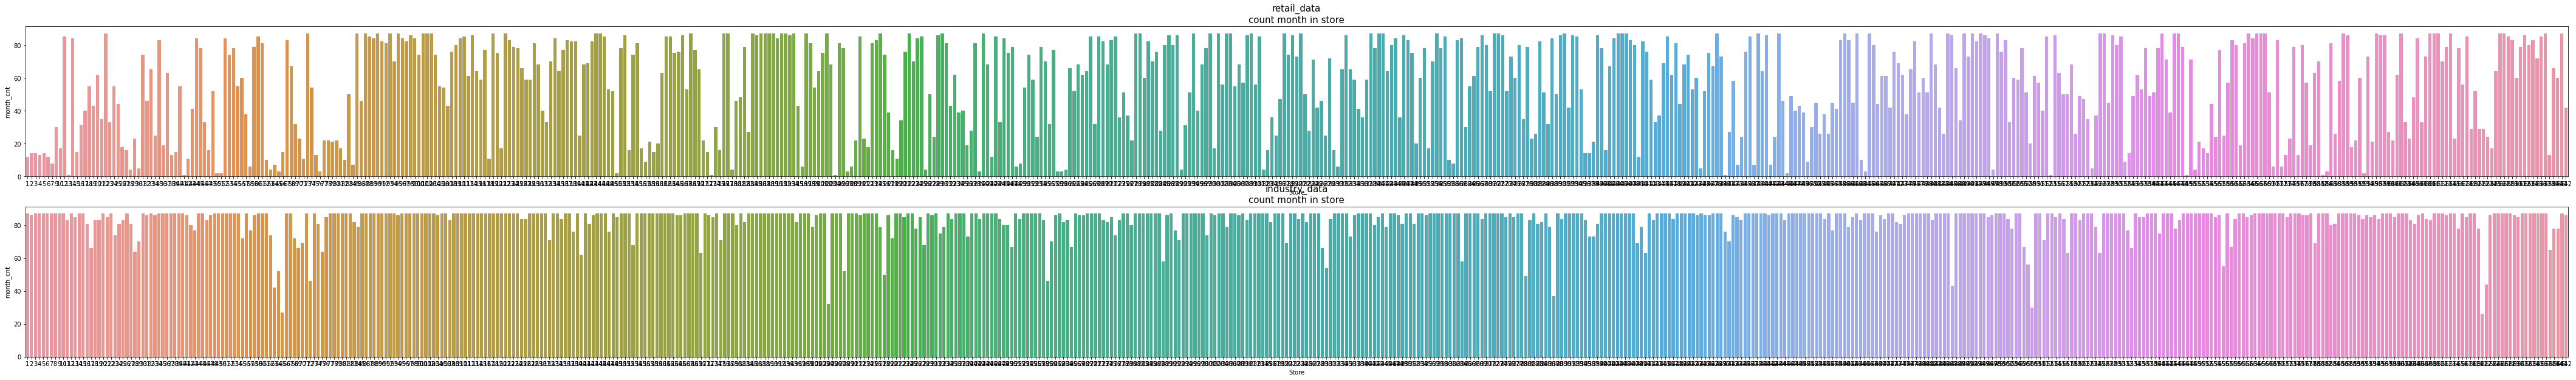

In [99]:
# 개수 bar 그래프(대략적인 비교용)
fig, axes = plt.subplots(2, 1, figsize=(75, 10))
sns.barplot(x=r_store_cnt_month["Store"], y=r_store_cnt_month["month_cnt"], ax=axes[0])
sns.barplot(x=i_store_cnt_month["Store"], y=i_store_cnt_month["month_cnt"], ax=axes[1])
axes[0].set_title("retail_data\ncount month in store", fontsize=15)
axes[1].set_title("industry_data\ncount month in store", fontsize=15);

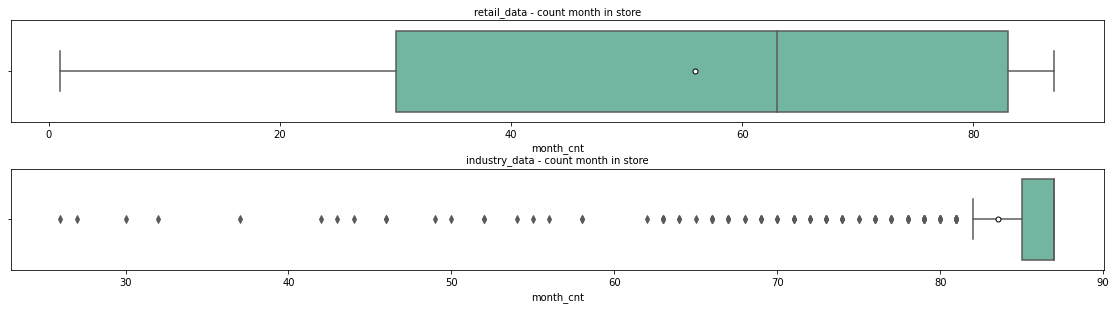

In [100]:
# Store별 가진 월 개수
fig, axes = plt.subplots(figsize=(16, 4), nrows=2)

sns.boxplot(
    data=r_store_cnt_month,
    x="month_cnt",
    showmeans=True,
    meanprops={"marker": "o", "markerfacecolor": "white", "markeredgecolor": "black", "markersize": "5"},
    palette="Set2",
    ax=axes[0],
)

plt.tight_layout()  # 간격 안겹치게

sns.boxplot(
    data=i_store_cnt_month,
    x="month_cnt",
    showmeans=True,
    meanprops={"marker": "o", "markerfacecolor": "white", "markeredgecolor": "black", "markersize": "5"},
    palette="Set2",
    ax=axes[1],
)


axes[0].set_title("retail_data - count month in store", fontsize=10)
axes[1].set_title("industry_data - count month in store", fontsize=10);

- retail data의 경우 가진 월의 수 차이가 많이남

#### 3) 가게별 가지고 있는 데이터의 월수가 가게 주인이랑 관련이 있는가?

In [104]:
dealer_hierarchies = pd.read_csv(f"{file_path}Dealer Hierarchies.csv")
dealer_hierarchies

,Store,Store Owner,Region Level 1,Region Level 2,Urban/Rural
0,1,1,Eisenstadt-Umgebung,GWR,Urban
1,2,1,Politischer Bezirk G?ssing,GWR,Urban
2,3,1,Politischer Bezirk Jennersdorf,GWR,Urban
3,4,1,Politischer Bezirk Jennersdorf,GWR,Urban
4,5,1,Politischer Bezirk Oberpullendorf,GWR,Urban
...,...,...,...,...,...
637,638,132,Graz Stadt,MMJ,Rural
638,639,300,Politischer Bezirk Eferding,ICA,Rural
639,640,301,Bene?ov,UQM,Rural
640,641,4,Nivala-Haapaj?rvi,IRA,Urban


In [105]:
r_owner = []
i_owner = []

for i in range(len(r_store_cnt_month)):
    store_id = r_store_cnt_month.loc[i]["Store"]
    r_owner.append(dealer_hierarchies.loc[store_id - 1]["Store Owner"])

for i in range(len(i_store_cnt_month)):
    store_id = i_store_cnt_month.loc[i]["Store"]
    i_owner.append(dealer_hierarchies.loc[store_id - 1]["Store Owner"])

r_store_cnt_month["owner"] = r_owner
i_store_cnt_month["owner"] = i_owner

In [117]:
r_store_cnt_month

,Store,month_cnt,owner
0,1,12,1
1,2,14,1
2,3,14,1
3,4,13,1
4,5,14,1
...,...,...,...
612,638,13,132
613,639,66,300
614,640,60,301
615,641,87,4


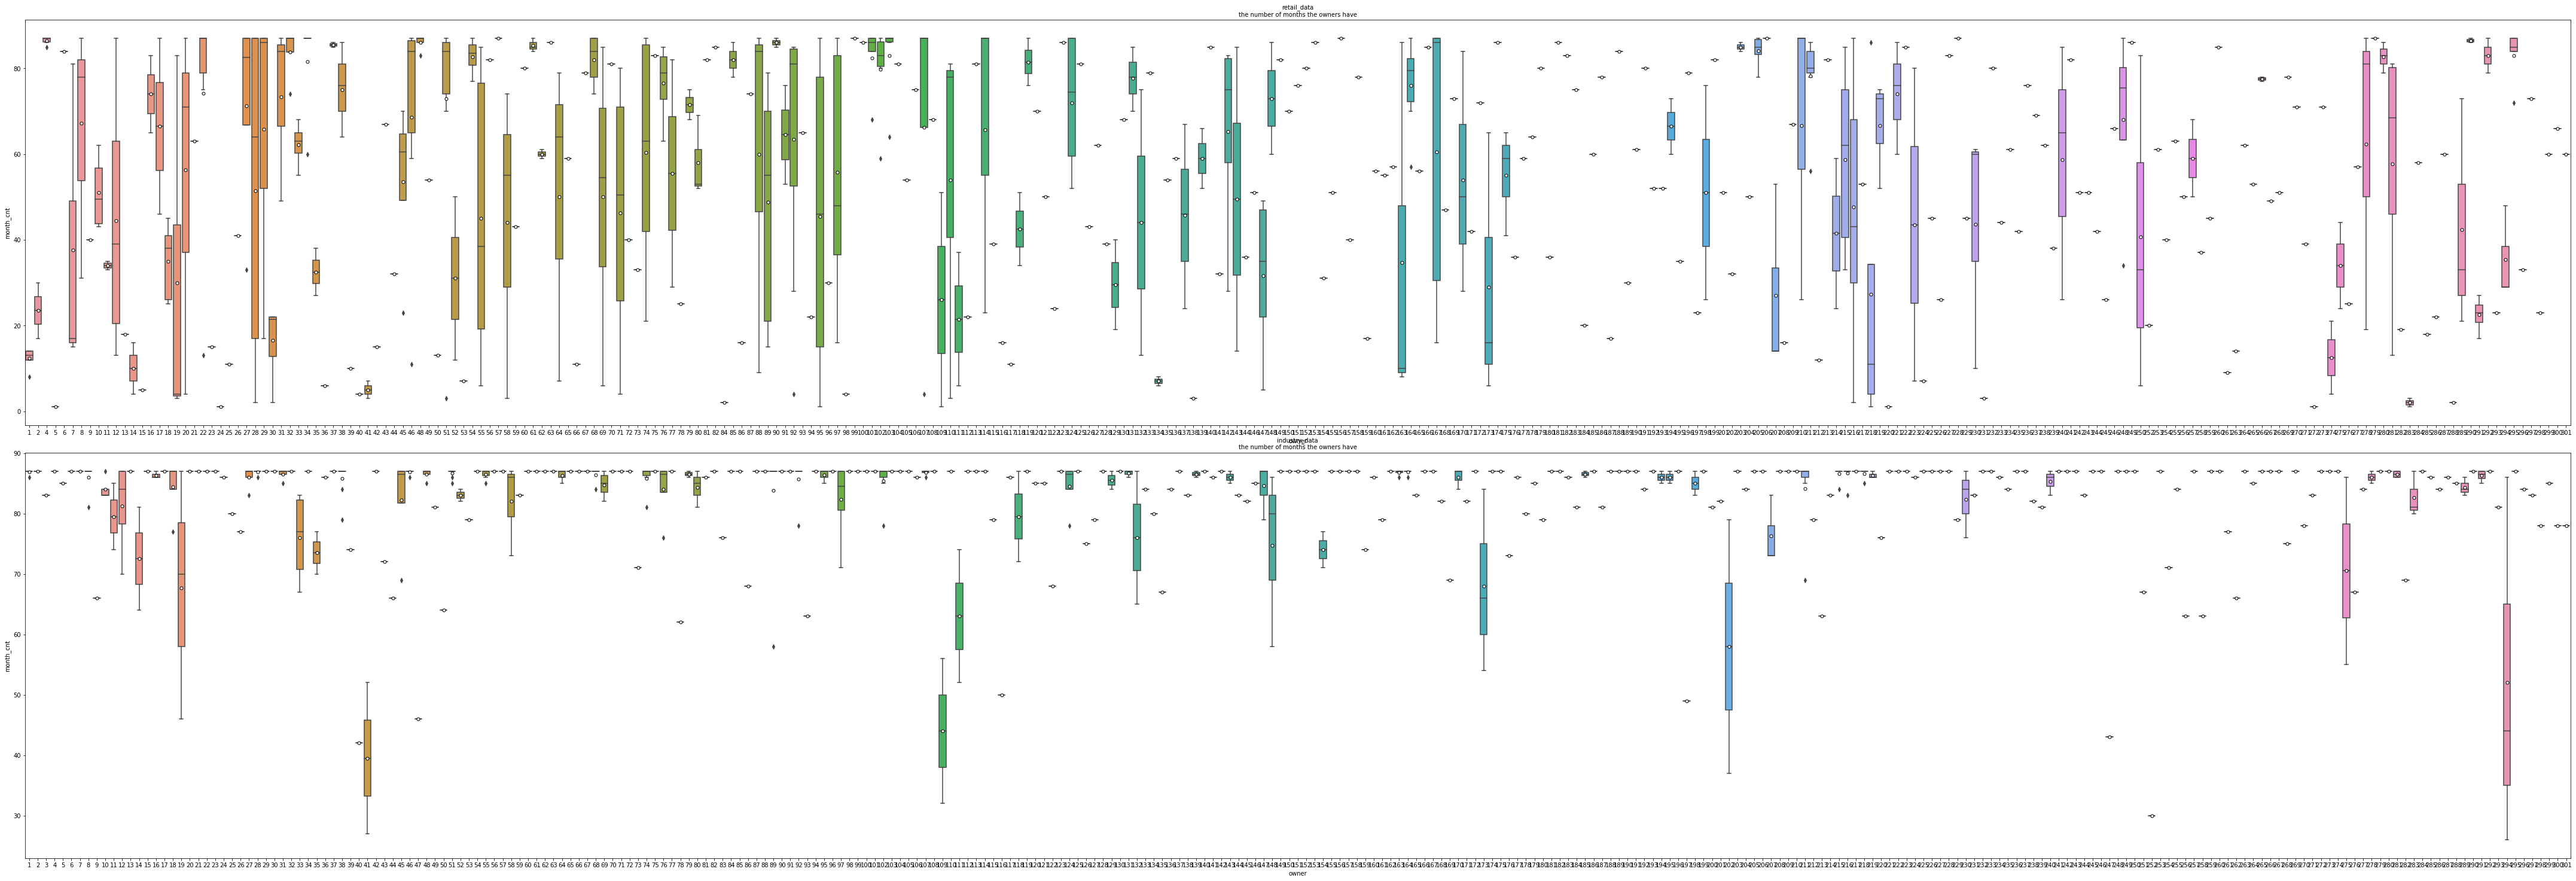

In [154]:
fig, axes = plt.subplots(2, 1, figsize=(60, 20))


sns.boxplot(
    data=r_store_cnt_month,
    x="owner",
    y="month_cnt",
    showmeans=True,
    meanprops={"marker": "o", "markerfacecolor": "white", "markeredgecolor": "black", "markersize": "5"},
    ax=axes[0],
)

plt.tight_layout()  # 간격 안겹치게

sns.boxplot(
    data=i_store_cnt_month,
    x="owner",
    y="month_cnt",
    showmeans=True,
    meanprops={"marker": "o", "markerfacecolor": "white", "markeredgecolor": "black", "markersize": "5"},
    ax=axes[1],
)
axes[0].set_title("retail_data\nthe number of months the owners have", fontsize=10)
axes[1].set_title("industry_data\nthe number of months the owners have", fontsize=10);

- month_cnt는 연속형 변수고 owner는 다분범주형 변수이다
- 따라서 polyserial correlation을 구한다  
(연속-연속 / 범주 - 범주 / 연속 - 범주 간 비교 참고: https://dodonam.tistory.com/217)

In [192]:
# https://github.com/eribean/RyStats/blob/1cdd0ea55a074cc81e61d2845216f395ba095f10/inferential/correlation.py
def polyserial_correlation(continuous, ordinal):
    """Computes the polyserial correlation.

    Estimates the correlation value based on a bivariate
    normal distribution. If the ordinal input is dichotomous,
    then the biserial correlation is returned.

    Args:
        continuous: Continuous Measurement
        ordinal: Ordinal Measurement

    Returns:
        dict: Dictionary of correlation,likelilhood ratio test (chi-squared), and p value

    Notes:
        User must handle missing data
    """
    # Get the number of ordinal values
    values, counts = np.unique(ordinal, return_counts=True)

    # Compute the thresholds (tau's)
    thresholds = sp.norm.isf(1 - counts.cumsum() / counts.sum())[:-1]

    # Standardize the continuous variable
    standardized_continuous = (continuous - continuous.mean()) / continuous.std(ddof=1)

    def _min_func(correlation):
        denominator = np.sqrt(1 - correlation * correlation)
        k = standardized_continuous * correlation
        log_likelihood = 0

        for ndx, value in enumerate(values):
            mask = ordinal == value

            if ndx == 0:
                numerator = thresholds[ndx] - k[mask]
                probabilty = sp.norm.cdf(numerator / denominator)

            elif ndx == (values.size - 1):
                numerator = thresholds[ndx - 1] - k[mask]
                probabilty = 1 - sp.norm.cdf(numerator / denominator)

            else:
                numerator1 = thresholds[ndx] - k[mask]
                numerator2 = thresholds[ndx - 1] - k[mask]
                probabilty = sp.norm.cdf(numerator1 / denominator) - sp.norm.cdf(numerator2 / denominator)

            log_likelihood -= np.log(probabilty).sum()

        return log_likelihood

    rho = fminbound(_min_func, -0.99, 0.99)

    # Likelihood ratio test
    log_likelihood_rho = _min_func(rho)
    log_likelihood_zero = _min_func(0.0)
    likelihood_ratio = -2 * (log_likelihood_rho - log_likelihood_zero)
    p_value = sp.chi2.sf(likelihood_ratio, 1)

    return {
        # 'Correlation': rho,
        # 'Likelihood Ratio': likelihood_ratio,
        "p-value": p_value
    }

In [193]:
r_store_cnt_month = r_store_cnt_month.astype({"owner": "str"})  # owner가 int형으로 되어있어서 범주형으로 간주가 안될 수 있음에 유의한다
i_store_cnt_month = i_store_cnt_month.astype({"owner": "str"})

print(polyserial_correlation(r_store_cnt_month["month_cnt"], r_store_cnt_month["owner"]))
print(polyserial_correlation(i_store_cnt_month["month_cnt"], i_store_cnt_month["owner"]))

{'p-value': 0.21033405921115692}
{'p-value': 0.6304478704716072}


## 2) 판매 제품과의 상관관계  
- https://www.kaggle.com/code/chrisbss1/cramer-s-v-correlation-matrix/notebook


In [195]:
retail_data_to_total_df = pd.read_csv(f"{file_path}retail_data_to_total_df.csv")
industry_data_to_total_df = pd.read_csv(f"{file_path}industry_data_to_total_df.csv")

In [202]:
retail_data_to_total_df_dd = retail_data_to_total_df[["Product Type", "Item", "Region Level 1", "Region Level 2"]]  # delete date (범주형만 담기 위함)
industry_data_to_total_df_dd = industry_data_to_total_df[["Product Type", "Item", "Region Level 1", "Region Level 2"]]

In [221]:
# Label encoding

label = preprocessing.LabelEncoder()
retail_data_encoded = pd.DataFrame()
industry_data_encoded = pd.DataFrame()

for i in retail_data_to_total_df_dd.columns:
    retail_data_encoded[i] = label.fit_transform(retail_data_to_total_df_dd[i])

for i in industry_data_to_total_df_dd.columns:
    industry_data_encoded[i] = label.fit_transform(industry_data_to_total_df_dd[i])

In [222]:
retail_data_encoded

,Product Type,Item,Region Level 1,Region Level 2
0,0,13,40,9
1,1,15,40,9
2,1,15,40,9
3,1,15,40,9
4,1,15,40,9
...,...,...,...,...
172563,1,16,114,21
172564,0,13,114,21
172565,0,3,114,21
172566,0,3,114,21


In [223]:
def cramers_V(var1, var2):
    crosstab = np.array(pd.crosstab(var1, var2, rownames=None, colnames=None))  # Cross table building
    stat = chi2_contingency(crosstab)[0]  # Keeping of the test statistic of the Chi2 test
    obs = np.sum(crosstab)  # Number of observations
    mini = min(crosstab.shape) - 1  # Take the minimum value between the columns and the rows of the cross table
    return stat / (obs * mini)

In [224]:
# building of the matrix
rows = []

for var1 in retail_data_encoded:
    col = []
    for var2 in retail_data_encoded:
        cramers = cramers_V(retail_data_encoded[var1], retail_data_encoded[var2])  # Cramer's V test
        col.append(round(cramers, 2))  # Keeping of the rounded value of the Cramer's V
    rows.append(col)

cramers_results = np.array(rows)
df = pd.DataFrame(cramers_results, columns=retail_data_encoded.columns, index=retail_data_encoded.columns)

rows = []

for var1 in industry_data_encoded:
    col = []
    for var2 in industry_data_encoded:
        cramers = cramers_V(industry_data_encoded[var1], industry_data_encoded[var2])  # Cramer's V test
        col.append(round(cramers, 2))  # Keeping of the rounded value of the Cramer's V
    rows.append(col)

cramers_results = np.array(rows)
df2 = pd.DataFrame(cramers_results, columns=industry_data_encoded.columns, index=industry_data_encoded.columns)

In [225]:
df

,Product Type,Item,Region Level 1,Region Level 2
Product Type,1.00,1.00,0.09,0.06
Item,1.00,1.00,0.03,0.02
Region Level 1,0.09,0.03,1.00,1.00
Region Level 2,0.06,0.02,1.00,1.00


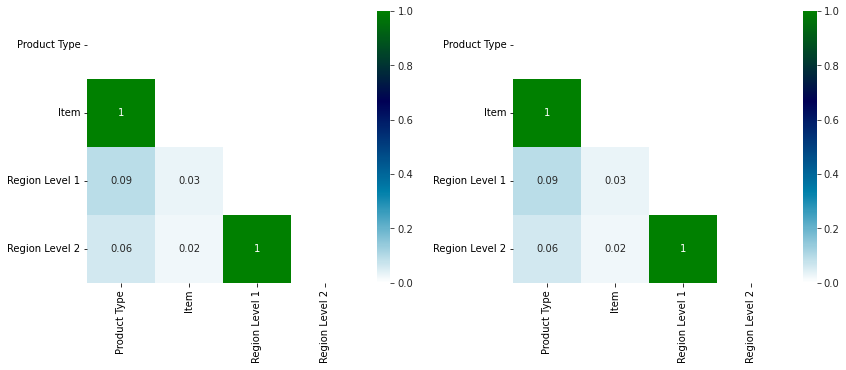

In [239]:
mask = np.zeros_like(df, dtype=bool)
mask[np.triu_indices_from(mask)] = True

mask2 = np.zeros_like(df2, dtype=bool)
mask2[np.triu_indices_from(mask)] = True

fig, axes = plt.subplots(1, 2, figsize=(14, 5))

with sns.axes_style("white"):
    ax = sns.heatmap(df, mask=mask, vmin=0.0, vmax=1, square=True, ax=axes[0], annot=True, cmap="ocean_r")
    ax = sns.heatmap(df, mask=mask, vmin=0.0, vmax=1, square=True, ax=axes[1], annot=True, cmap="ocean_r")

plt.show();

0: 연관성 X, 1: 강한 연관성